# Feature Visualization

Take a look on how these data looks like.

In [1]:
# need to mount data which locate at google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [12]:
#cd gdrive/
#cd My\ Drive
#cd ColabNotebooks/
ls

gdrive/  sample_data/


## Loading Packages

In [5]:
!pip install mxnet

In [0]:

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from mxnet import image as mximg

# With the following, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell 
# that produced it. The resulting plots will then also be stored in the 
# notebook document.
%matplotlib inline

## Setting parameters

In [0]:
data_dir  = "./gdrive/My Drive/ColabNotebooks/data"
#train_dir = "train"
#test_dir  = "test"

In [16]:
ls

gdrive/  sample_data/


## Number of images

In [21]:
data_num = len([name for name in os.listdir(data_dir)])
print(os.listdir(data_dir))
print(data_num)

#train_num = len([name for name in os.listdir(os.path.join('.', data_dir, train_dir)) \
    #if os.path.isfile(os.path.join(data_dir, train_dir, name))])
#test_num = len([name for name in os.listdir(os.path.join('.', data_dir, test_dir)) \
    #if os.path.isfile(os.path.join(data_dir, test_dir, name))])

#print ("Number of training images: %d" % train_num)
#print ("Number of testing timages: %d" % test_num)



['n02097658-silky_terrier', 'n02091831-Saluki', 'n02102318-cocker_spaniel', 'n02095314-wire-haired_fox_terrier', 'n02099849-Chesapeake_Bay_retriever', 'n02091244-Ibizan_hound', 'n02090622-borzoi', 'n02104365-schipperke', 'n02113023-Pembroke', 'n02092002-Scottish_deerhound', 'n02113799-standard_poodle', 'n02095889-Sealyham_terrier', 'n02093256-Staffordshire_bullterrier', 'n02085782-Japanese_spaniel', 'n02110063-malamute', 'n02089973-English_foxhound', 'n02099601-golden_retriever', 'n02105505-komondor', 'n02109961-Eskimo_dog', 'n02097047-miniature_schnauzer', 'n02105162-malinois', 'n02097130-giant_schnauzer', 'n02106382-Bouvier_des_Flandres', 'n02086079-Pekinese', 'n02110185-Siberian_husky', 'n02106662-German_shepherd', 'n02097209-standard_schnauzer', 'n02113978-Mexican_hairless', 'n02115913-dhole', 'n02107142-Doberman', 'n02094258-Norwich_terrier', 'n02094114-Norfolk_terrier', 'n02085936-Maltese_dog', 'n02109525-Saint_Bernard', 'n02108422-bull_mastiff', 'n02093754-Border_terrier', 'n021

## Label

In [22]:
label_dir = "./gdrive/My Drive/ColabNotebooks/label"

labels = pd.read_csv(os.path.join(label_dir, "all_dogs.csv"))

print ("Number of classes: %d" % len(set(labels.breed)))
print ("Missing labels: " + str(labels.isnull().values.any()))

Number of classes: 120
Missing labels: False


In [0]:
class_freq = labels.breed.value_counts()

In [25]:
class_freq.head()

Maltese_dog           252
Afghan_hound          239
Scottish_deerhound    232
Pomeranian            219
Irish_wolfhound       218
Name: breed, dtype: int64

In [26]:
class_freq.tail()

Border_collie          150
kuvasz                 150
Irish_water_spaniel    150
Pekinese               149
redbone                148
Name: breed, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Distribution of Dog breeds')

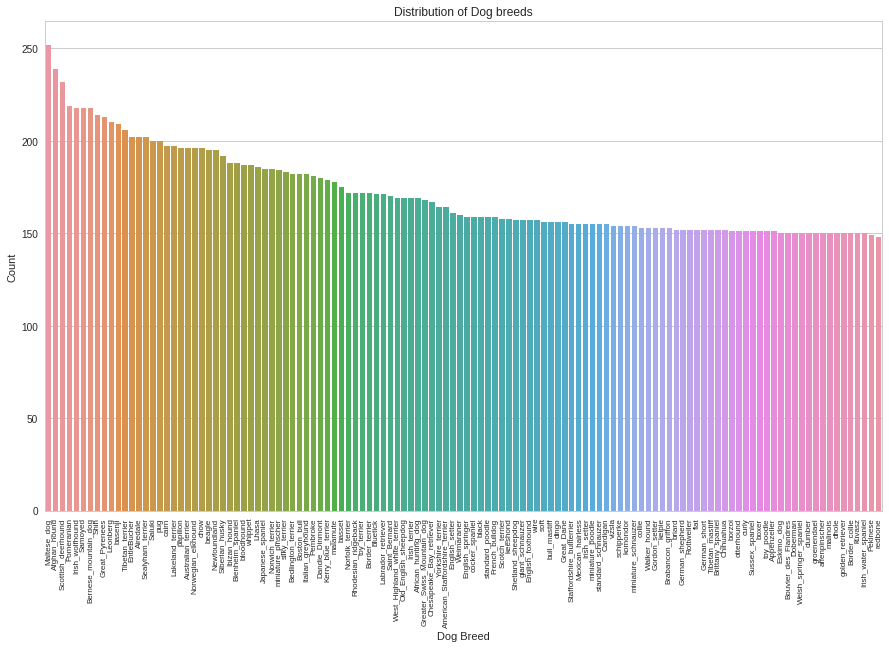

In [27]:

yy = pd.value_counts(labels['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')

# Show Data

Image shape:  (324, 500, 3)
Image type :  malinois

[[ 1  9]
 [ 7 22]]
<NDArray 2x2 @cpu(0)>


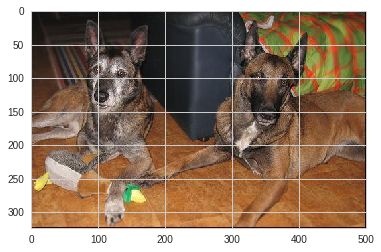

In [33]:
rand_idx  = np.random.randint(len(labels))

img_floder= labels.iloc[rand_idx].breed_id
img_id    = labels.iloc[rand_idx].id
img_class = labels.iloc[rand_idx].breed
child_dir = img_floder + "-" + img_class



img       = mximg.imread(os.path.join(data_dir, child_dir, img_id))

print ("Image shape: ", img.shape)
print ("Image type : ", img_class)
print (img[:2,:2, 0])
plt.imshow(img.asnumpy())

# Tips

- Images have different size, we will deal with this problem in later mode building step